# Saving Circuits to Disk

**Course**: Quantum Computing Laboratory  
**Version**: 2.2 (Qiskit 2.2 Compatible)  
**Last Updated**: November 2025

---

## 📚 Overview

Learn how to save and load quantum circuits using **QPY (Qiskit Python)** format - the standard serialization format for Qiskit circuits.

### Topics Covered:
- Saving single circuits
- Loading circuits from disk
- Saving multiple circuits
- Version compatibility
- Best practices for circuit persistence

## 🎯 Learning Objectives

1. ✅ Understand QPY format
2. ✅ Save circuits to files
3. ✅ Load circuits from files
4. ✅ Manage multiple circuits
5. ✅ Apply to version control and collaboration

## 🔧 Prerequisites

**Required Knowledge:**
- Basic circuit construction
- Python file I/O basics

**Required Software:**
- Python 3.9+
- Qiskit 2.2+

**Recommended Previous Notebooks:**
- `Circuit_Construction_v2_2_enhanced.ipynb`

## 📖 Why Save Circuits?

### Use Cases

**1. Version Control**
- Track circuit evolution over time
- Collaborate with Git
- Reproducible research

**2. Circuit Libraries**
- Build reusable circuit collections
- Share with collaborators
- Standard benchmarks

**3. Long Experiments**
- Save intermediate results
- Resume interrupted work
- Checkpoint complex workflows

**4. Production Deployment**
- Deploy to different environments
- Separate development from execution
- Maintain circuit consistency

### QPY Format Advantages

✅ **Binary format** - Efficient storage  
✅ **Version resilient** - Forward/backward compatibility  
✅ **Complete preservation** - All circuit metadata  
✅ **Fast I/O** - Quick serialization/deserialization  
✅ **Cross-platform** - Works everywhere  

In [1]:
# Qiskit 2.2 imports
from qiskit import QuantumCircuit, qpy
from qiskit.circuit.library import QFT, GroverOperator
from qiskit.visualization import circuit_drawer
import os
import glob

print("✓ All imports successful!")
print("  Qiskit 2.2 QPY module loaded")

✓ All imports successful!
  Qiskit 2.2 QPY module loaded


## 💾 Saving a Single Circuit

### Basic Save Operation

Circuit created:
  Name: Bell_State
  Qubits: 2
  Depth: 3
  Gates: 4


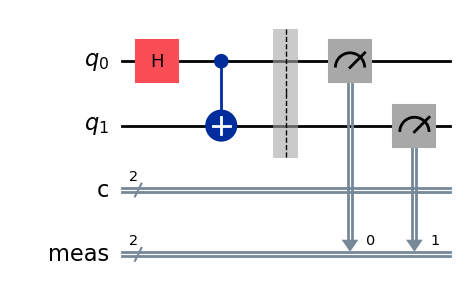

In [2]:
# Create a simple Bell state circuit
qc = QuantumCircuit(2, 2, name='Bell_State')
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

print("Circuit created:")
print(f"  Name: {qc.name}")
print(f"  Qubits: {qc.num_qubits}")
print(f"  Depth: {qc.depth()}")
print(f"  Gates: {qc.size()}")

# Display circuit
qc.draw('mpl')

In [3]:
# Save circuit to file
filename = 'bell_state.qpy'

with open(filename, 'wb') as file:
    qpy.dump(qc, file)

print(f"✓ Circuit saved to: {filename}")
print(f"  File size: {os.path.getsize(filename)} bytes")

✓ Circuit saved to: bell_state.qpy
  File size: 443 bytes


## 📂 Loading a Circuit

### Basic Load Operation

✓ Circuit loaded successfully
  Name: Bell_State
  Qubits: 2
  Depth: 3
  Gates: 4

✓ Matches original: True


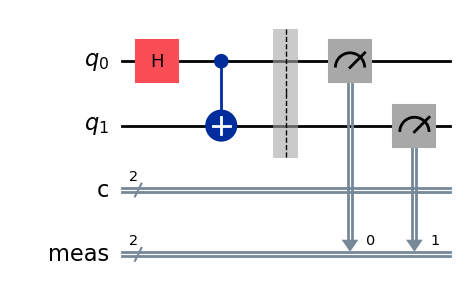

In [4]:
# Load circuit from file
with open(filename, 'rb') as file:
    loaded_circuits = qpy.load(file)
    loaded_qc = loaded_circuits[0]  # QPY returns a list

print("✓ Circuit loaded successfully")
print(f"  Name: {loaded_qc.name}")
print(f"  Qubits: {loaded_qc.num_qubits}")
print(f"  Depth: {loaded_qc.depth()}")
print(f"  Gates: {loaded_qc.size()}")

# Verify it matches original
print(f"\n✓ Matches original: {loaded_qc == qc}")

# Display loaded circuit
loaded_qc.draw('mpl')

## 📦 Saving Multiple Circuits

### Circuit Collections

In [5]:
# Create multiple circuits
circuits = []

# 1. Bell state
qc_bell = QuantumCircuit(2, name='Bell')
qc_bell.h(0)
qc_bell.cx(0, 1)
circuits.append(qc_bell)

# 2. GHZ state (3-qubit entanglement)
qc_ghz = QuantumCircuit(3, name='GHZ')
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
circuits.append(qc_ghz)

# 3. W state (different 3-qubit entanglement)
qc_w = QuantumCircuit(3, name='W_State')
qc_w.ry(1.9106, 0)  # Specific angles for W state
qc_w.cx(0, 1)
qc_w.x(0)
qc_w.ry(1.9106, 0)
qc_w.cx(0, 2)
circuits.append(qc_w)

# 4. QFT circuit
qc_qft = QFT(3, name='QFT_3')
circuits.append(qc_qft)

print(f"Created {len(circuits)} circuits:")
for i, circ in enumerate(circuits):
    print(f"  {i+1}. {circ.name}: {circ.num_qubits} qubits, depth {circ.depth()}")

Created 4 circuits:
  1. Bell: 2 qubits, depth 2
  2. GHZ: 3 qubits, depth 3
  3. W_State: 3 qubits, depth 5
  4. QFT_3: 3 qubits, depth 1


/tmp/ipykernel_179890/3307290466.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_qft = QFT(3, name='QFT_3')


In [6]:
# Save all circuits to one file
multi_filename = 'circuit_library.qpy'

with open(multi_filename, 'wb') as file:
    qpy.dump(circuits, file)

print(f"✓ {len(circuits)} circuits saved to: {multi_filename}")
print(f"  File size: {os.path.getsize(multi_filename)} bytes")

✓ 4 circuits saved to: circuit_library.qpy
  File size: 1694 bytes


### Loading Multiple Circuits

✓ Loaded 4 circuits:
  1. Bell: 2 qubits, depth 2
  2. GHZ: 3 qubits, depth 3
  3. W_State: 3 qubits, depth 5
  4. QFT_3: 3 qubits, depth 1

Displaying first circuit (Bell):


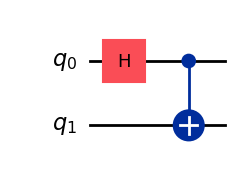

In [7]:
# Load all circuits
with open(multi_filename, 'rb') as file:
    loaded_circuits = qpy.load(file)

print(f"✓ Loaded {len(loaded_circuits)} circuits:")
for i, circ in enumerate(loaded_circuits):
    print(f"  {i+1}. {circ.name}: {circ.num_qubits} qubits, depth {circ.depth()}")

# Display first circuit
print(f"\nDisplaying first circuit ({loaded_circuits[0].name}):")
loaded_circuits[0].draw('mpl')

## 🔄 Advanced: Circuit Management

### Organized Storage

In [8]:
# Create organized directory structure
import os

# Create directories if they don't exist
os.makedirs('circuits/bell_states', exist_ok=True)
os.makedirs('circuits/algorithms', exist_ok=True)
os.makedirs('circuits/benchmarks', exist_ok=True)

print("✓ Directory structure created:")
print("  circuits/")
print("    ├── bell_states/")
print("    ├── algorithms/")
print("    └── benchmarks/")

✓ Directory structure created:
  circuits/
    ├── bell_states/
    ├── algorithms/
    └── benchmarks/


In [9]:
# Save circuits to organized locations
def save_circuit(circuit, category, filename):
    """Save circuit to organized directory structure."""
    path = f'circuits/{category}/{filename}'
    with open(path, 'wb') as file:
        qpy.dump(circuit, file)
    return path

# Save our circuits
paths = []
paths.append(save_circuit(circuits[0], 'bell_states', 'bell.qpy'))
paths.append(save_circuit(circuits[1], 'bell_states', 'ghz.qpy'))
paths.append(save_circuit(circuits[2], 'bell_states', 'w_state.qpy'))
paths.append(save_circuit(circuits[3], 'algorithms', 'qft_3.qpy'))

print("✓ Circuits saved to organized directories:")
for path in paths:
    print(f"  {path}")

✓ Circuits saved to organized directories:
  circuits/bell_states/bell.qpy
  circuits/bell_states/ghz.qpy
  circuits/bell_states/w_state.qpy
  circuits/algorithms/qft_3.qpy


### Loading from Directory

In [10]:
# Load all circuits from a directory
def load_circuits_from_directory(directory):
    """Load all QPY files from a directory."""
    circuits = []
    pattern = f'{directory}/*.qpy'
    
    for filepath in glob.glob(pattern):
        with open(filepath, 'rb') as file:
            loaded = qpy.load(file)
            circuits.extend(loaded)
    
    return circuits

# Load all Bell state circuits
bell_circuits = load_circuits_from_directory('circuits/bell_states')

print(f"✓ Loaded {len(bell_circuits)} Bell state circuits:")
for circ in bell_circuits:
    print(f"  - {circ.name}")

✓ Loaded 3 Bell state circuits:
  - W_State
  - GHZ
  - Bell


## 📊 Circuit Metadata

### Preserving Circuit Information

In [11]:
# Create circuit with metadata
qc_meta = QuantumCircuit(2, name='Documented_Circuit')
qc_meta.h(0)
qc_meta.cx(0, 1)

# Add metadata (stored in circuit)
qc_meta.metadata = {
    'author': 'Roberto Cappuccio',
    'date': '2025-11-19',
    'purpose': 'Educational example',
    'version': '1.0',
    'notes': 'Standard Bell state preparation'
}

print("Circuit with metadata:")
print(f"  Name: {qc_meta.name}")
print(f"  Metadata: {qc_meta.metadata}")

Circuit with metadata:
  Name: Documented_Circuit
  Metadata: {'author': 'Roberto Cappuccio', 'date': '2025-11-19', 'purpose': 'Educational example', 'version': '1.0', 'notes': 'Standard Bell state preparation'}


In [12]:
# Save and load with metadata
with open('circuit_with_metadata.qpy', 'wb') as file:
    qpy.dump(qc_meta, file)

with open('circuit_with_metadata.qpy', 'rb') as file:
    loaded_meta = qpy.load(file)[0]

print("✓ Loaded circuit with metadata:")
print(f"  Name: {loaded_meta.name}")
print(f"  Metadata preserved: {loaded_meta.metadata}")
print(f"\nMetadata details:")
for key, value in loaded_meta.metadata.items():
    print(f"  {key}: {value}")

✓ Loaded circuit with metadata:
  Name: Documented_Circuit
  Metadata preserved: {'author': 'Roberto Cappuccio', 'date': '2025-11-19', 'purpose': 'Educational example', 'version': '1.0', 'notes': 'Standard Bell state preparation'}

Metadata details:
  author: Roberto Cappuccio
  date: 2025-11-19
  purpose: Educational example
  version: 1.0
  notes: Standard Bell state preparation


## ⚠️ Best Practices

### 1. File Naming Conventions

In [13]:
# Good naming practices
def generate_circuit_filename(circuit, version='v1'):
    """
    Generate standardized filename for circuit.
    
    Format: <name>_<qubits>q_<version>.qpy
    """
    safe_name = circuit.name.lower().replace(' ', '_')
    return f"{safe_name}_{circuit.num_qubits}q_{version}.qpy"

# Example
qc_example = QuantumCircuit(5, name='Grover Oracle')
filename = generate_circuit_filename(qc_example)
print(f"Generated filename: {filename}")
print("\nNaming best practices:")
print("  ✓ Use descriptive names")
print("  ✓ Include qubit count")
print("  ✓ Version your circuits")
print("  ✓ Use lowercase and underscores")
print("  ✓ Add .qpy extension")

Generated filename: grover_oracle_5q_v1.qpy

Naming best practices:
  ✓ Use descriptive names
  ✓ Include qubit count
  ✓ Version your circuits
  ✓ Use lowercase and underscores
  ✓ Add .qpy extension


### 2. Error Handling

In [14]:
# Robust save/load functions
def safe_save(circuit, filename):
    """Safely save circuit with error handling."""
    try:
        with open(filename, 'wb') as file:
            qpy.dump(circuit, file)
        print(f"✓ Successfully saved: {filename}")
        return True
    except Exception as e:
        print(f"✗ Error saving {filename}: {e}")
        return False

def safe_load(filename):
    """Safely load circuit with error handling."""
    try:
        with open(filename, 'rb') as file:
            circuits = qpy.load(file)
        print(f"✓ Successfully loaded: {filename}")
        return circuits
    except FileNotFoundError:
        print(f"✗ File not found: {filename}")
        return None
    except Exception as e:
        print(f"✗ Error loading {filename}: {e}")
        return None

# Test
test_qc = QuantumCircuit(2)
test_qc.h(0)
safe_save(test_qc, 'test_safe.qpy')
loaded = safe_load('test_safe.qpy')
loaded_missing = safe_load('nonexistent.qpy')

✓ Successfully saved: test_safe.qpy
✓ Successfully loaded: test_safe.qpy
✗ File not found: nonexistent.qpy


### 3. Version Control Integration

In [15]:
# Tips for Git integration
print("Git Best Practices for QPY Files:")
print("="*60)
print("\n1. .gitignore recommendations:")
print("   # Ignore temporary circuit files")
print("   *_temp.qpy")
print("   *_scratch.qpy")
print("")
print("2. Commit messages:")
print("   ✓ 'Add: Bell state circuit for teleportation'")
print("   ✓ 'Update: Increase QFT depth to 5 qubits'")
print("   ✓ 'Fix: Correct phase in Grover oracle'")
print("")
print("3. Directory structure:")
print("   circuits/")
print("     ├── algorithms/    (versioned algorithms)")
print("     ├── benchmarks/    (standard test circuits)")
print("     └── experiments/   (research circuits)")
print("")
print("4. Documentation:")
print("   - Include README in circuits/ directory")
print("   - Document circuit purpose and parameters")
print("   - Note Qiskit version used")

Git Best Practices for QPY Files:

1. .gitignore recommendations:
   # Ignore temporary circuit files
   *_temp.qpy
   *_scratch.qpy

2. Commit messages:
   ✓ 'Add: Bell state circuit for teleportation'
   ✓ 'Update: Increase QFT depth to 5 qubits'
   ✓ 'Fix: Correct phase in Grover oracle'

3. Directory structure:
   circuits/
     ├── algorithms/    (versioned algorithms)
     ├── benchmarks/    (standard test circuits)
     └── experiments/   (research circuits)

4. Documentation:
   - Include README in circuits/ directory
   - Document circuit purpose and parameters
   - Note Qiskit version used


## 🧹 Cleanup

In [16]:
# Clean up created files (optional)
import shutil

def cleanup_demo_files():
    """Remove demo files created in this notebook."""
    # Remove individual files
    files_to_remove = [
        'bell_state.qpy',
        'circuit_library.qpy',
        'circuit_with_metadata.qpy',
        'test_safe.qpy'
    ]
    
    for file in files_to_remove:
        try:
            os.remove(file)
            print(f"✓ Removed: {file}")
        except FileNotFoundError:
            pass
    
    # Remove circuits directory
    try:
        shutil.rmtree('circuits')
        print("✓ Removed: circuits/ directory")
    except FileNotFoundError:
        pass

# Uncomment to run cleanup
# cleanup_demo_files()
print("To clean up demo files, uncomment and run the cell above.")

To clean up demo files, uncomment and run the cell above.


## 🎓 Exercises

### Exercise 1: Save Your Own Circuit (Easy)
Create a 3-qubit GHZ state circuit, add metadata with your name and date, then save and reload it.

```python
# Your solution here
```

### Exercise 2: Circuit Library (Medium)
Create a library of 5 different algorithm circuits (your choice), save them to an organized directory structure, and create a function to load any circuit by name.

### Exercise 3: Version Management (Hard)
Implement a circuit versioning system that:
1. Saves circuits with version numbers
2. Tracks changes in metadata
3. Can rollback to previous versions
4. Generates a version history report

## 📖 References

### Documentation

1. **Qiskit QPY Format**:  
   https://docs.quantum.ibm.com/api/qiskit/qpy

2. **Circuit Serialization Guide**:  
   https://docs.quantum.ibm.com/guides/save-circuits

### Best Practices

- Always use QPY format (not pickle) for forward compatibility
- Include metadata for traceability
- Use version control for circuit evolution
- Organize circuits by purpose/algorithm
- Document circuit parameters and usage

---

**Course**: Quantum Computing Laboratory  
**License**: MIT  
**Version**: 2.2.0  
**Last Updated**: November 2025